# Financial News Headline Sentiment Analysis with BERT
This is a short notebook that loads news headlines from three news sources, CNBC, Guardian, and Reuters; then perform sentiment analsyis with Bert!

## Dependencies

In [1]:
!pip install transformers

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

## Instantiate Model

In [3]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## Test out the model

In [4]:
#Encode
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')
result = model(tokens)

In [5]:
#Sentiment
result.logits
int(torch.argmax(result.logits))+1

4

## Let's get the news data

Imports

In [6]:
import numpy as np
import pandas as pd

In [103]:
cnbc_df =  pd.read_csv("cnbc_headlines.csv")
guardian_df =  pd.read_csv("guardian_headlines.csv")
reuters_df =  pd.read_csv("reuters_headlines.csv")

### CNBC Data

In [100]:
cnbc_df.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [106]:
cnbc_df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [107]:
# we are not using Description column because guardian doesn't have one
cnbc_df = cnbc_df.drop(['Description'] , axis = 1)

In [ ]:
cnbc_df.info()

In [ ]:
cnbc_df.isna().sum()

In [110]:
cnbc_df.dropna(inplace=True)

### Guardian Data

In [111]:
guardian_df.head

<bound method NDFrame.head of             Time                                          Headlines
0      18-Jul-20   Johnson is asking Santa for a Christmas recovery
1      18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
2      18-Jul-20  Five key areas Sunak must tackle to serve up e...
3      18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
4      18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...
...          ...                                                ...
17795  17-Dec-17  How investing in solar energy can create a bri...
17796  17-Dec-17     Poundland suppliers hit by insurance downgrade
17797  17-Dec-17  Cryptocurrencies: City watchdog to investigate...
17798  17-Dec-17  Unilever sells household name spreads to KKR f...
17799  17-Dec-17  The Guardian view on Ryanair’s model: a union-...

[17800 rows x 2 columns]>

In [112]:
guardian_df.iloc[0]

Time                                                18-Jul-20
Headlines    Johnson is asking Santa for a Christmas recovery
Name: 0, dtype: object

In [132]:
guardian_df.isnull().sum()

Time         0
Headlines    0
Sentiment    0
dtype: int64

### Reuters Data

In [113]:
reuters_df.head

<bound method NDFrame.head of                                                Headlines         Time  \
0      TikTok considers London and other locations fo...  Jul 18 2020   
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2      Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3      Twitter says attackers downloaded data from up...  Jul 18 2020   
4      U.S. Republicans seek liability protections as...  Jul 17 2020   
...                                                  ...          ...   
32765  Malaysia says never hired British data firm at...  Mar 20 2018   
32766  Prosecutors search Volkswagen headquarters in ...  Mar 20 2018   
32767   McDonald's sets greenhouse gas reduction targets  Mar 20 2018   
32768  Pratt & Whitney to deliver spare A320neo engin...  Mar 20 2018   
32769  UK will always consider ways to improve data l...  Mar 20 2018   

                                             Description  
0      TikTok has been in discussi

In [114]:
reuters_df.iloc[0]

Headlines      TikTok considers London and other locations fo...
Time                                                 Jul 18 2020
Description    TikTok has been in discussions with the UK gov...
Name: 0, dtype: object

In [115]:
reuters_df.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [116]:
reuters_df = reuters_df.drop(['Description'] , axis = 1)

## Run Data through BERT

In [117]:
# Function that takes in news and outputs sentiment
def sentiment_score(news):
    tokens = tokenizer.encode(news, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [118]:
# Send each news outlet's headlines through the BART Model and store the Sentiment output. This may take a while ... 
cnbc_df['Sentiment'] = cnbc_df['Headlines'].apply(lambda x: sentiment_score(x[:]))
guardian_df['Sentiment'] = guardian_df['Headlines'].apply(lambda x: sentiment_score(x[:]))
reuters_df['Sentiment'] = reuters_df['Headlines'].apply(lambda x: sentiment_score(x[:]))

In [133]:
cnbc_df

,Headlines,Time,Sentiment
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",5
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",4
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",5
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",5
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",4
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017",1
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",1
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",1
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017",4


In [120]:
guardian_df

,Time,Headlines,Sentiment
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,4
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...,1
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...,5
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...,1
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,5
...,...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...,5
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade,1
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...,4
17798,17-Dec-17,Unilever sells household name spreads to KKR f...,1


In [130]:
reuters_df

,Headlines,Time,Sentiment
0,TikTok considers London and other locations fo...,Jul 18 2020,3
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,1
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,1
3,Twitter says attackers downloaded data from up...,Jul 18 2020,1
4,U.S. Republicans seek liability protections as...,Jul 17 2020,1
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,1
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,1
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,5
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,5


## Visualize Results

In [134]:
import matplotlib.pyplot as plt

In [149]:
def plot_pie_sentiment(df, name):
    sentiment_counts = df['Sentiment'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    
    # Add a legend
    plt.legend(title='Sentiments', labels=sentiment_counts.index, loc='upper left')
    
    plt.title('Distribution of Sentiments in ' + name + ' Dataset')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

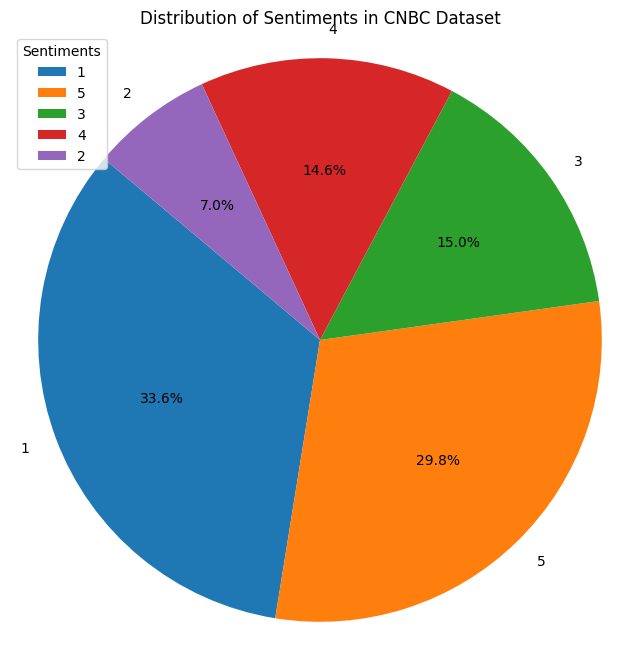

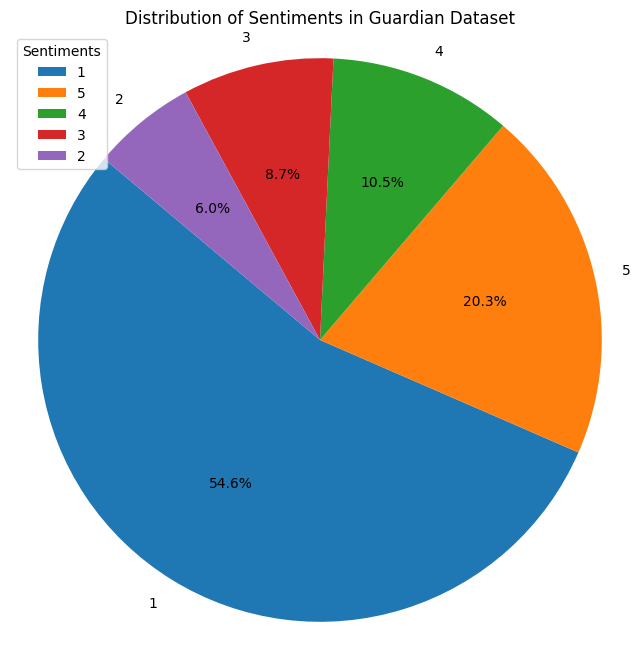

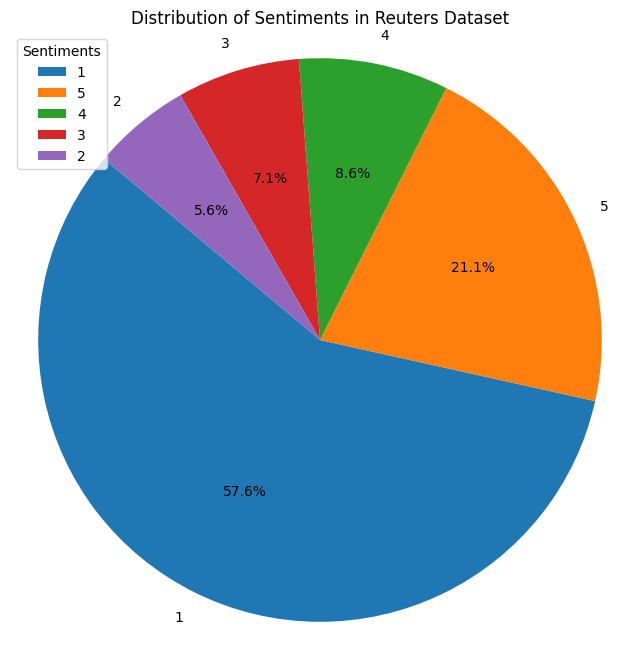

In [165]:
plot_pie_sentiment(cnbc_df, 'CNBC')
plot_pie_sentiment(guardian_df, 'Guardian')
plot_pie_sentiment(reuters_df, 'Reuters')

Wow, it seems most of the financial news from these outlets is on the negative side. 

## Let's Export the Dataframes

In [131]:
cnbc_df.to_csv('cnbc_sentiment.csv')
guardian_df.to_csv('guardian_sentiment.csv')
reuters_df.to_csv('reuters_sentiment.csv')